For this project, our team will be utilizing a dataset represented as both a CSV and JSON file. The following CSV import code was executed to upload the dataset to a local instance of MongoDB(JSON code provided as well):

JSON:
mongoimport --type json -d salary -c salaries --drop --jsonArray salaries.json

CSV:
mongoimport --type csv -d salary -c salaries --headerline --drop salaries.csv

### Dataset Cleaning/Extraction/Transformation & Database Interaction

In [1]:
# Import dependencies
import pandas as pd
import hvplot.pandas
from pprint import pprint
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import panel as pn
import requests
import json
from api_key import key_one
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Initial check to confirm dataset congruency/integrity between both filetypes (30,151 entries)
initial_csv_df = pd.read_csv("Resources/salaries.csv")
initial_csv_df


work_year experience_level employment_type  \
0           2024               SE              FT   
1           2024               SE              FT   
2           2024               SE              FT   
3           2024               SE              FT   
4           2024               SE              FT   
...          ...              ...             ...   
30146       2020               SE              FT   
30147       2021               MI              FT   
30148       2020               EN              FT   
30149       2020               EN              CT   
30150       2021               SE              FT   

                            job_title   salary salary_currency  salary_in_usd  \
0                       Lead Engineer   355000             USD         355000   
1                       Lead Engineer   194000             USD         194000   
2                     Data Specialist    45000             GBP          56250   
3                     Data Specialist    36000             GBP          45000   
4      Business Intelligence Engineer   116800             USD         116800   
...                               ...      ...             ...            ...   
30146                  Data Scientist   412000             USD         412000   
30147        Principal Data Scientist   151000             USD         151000   
30148                  Data Scientist   105000             USD         105000   
30149           Business Data Analyst   100000             USD         100000   
30150                  Data Scientist  7000000             INR          94665   

      employee_residence  remote_ratio company_location company_size  
0                     US             0               US            M  
1                     US             0               US            M  
2                     GB             0               GB            M  
3                     GB             0               GB            M  
4                     US             0               US            M  
...                  ...           ...              ...          ...  
30146                 US           100               US            L  
30147                 US           100               US            L  
30148                 US           100               US            S  
30149                 US           100               US            L  
30150                 IN            50               IN            L  

[30151 rows x 11 columns]

In [3]:
# Initial check to confirm dataset congruency/integrity between both filetypes (30,151 entries)
initial_json_df = pd.read_json("Resources/salaries.json")
initial_json_df


work_year experience_level employment_type  \
0           2024               SE              FT   
1           2024               SE              FT   
2           2024               SE              FT   
3           2024               SE              FT   
4           2024               SE              FT   
...          ...              ...             ...   
30146       2020               SE              FT   
30147       2021               MI              FT   
30148       2020               EN              FT   
30149       2020               EN              CT   
30150       2021               SE              FT   

                            job_title   salary salary_currency  salary_in_usd  \
0                       Lead Engineer   355000             USD         355000   
1                       Lead Engineer   194000             USD         194000   
2                     Data Specialist    45000             GBP          56250   
3                     Data Specialist    36000             GBP          45000   
4      Business Intelligence Engineer   116800             USD         116800   
...                               ...      ...             ...            ...   
30146                  Data Scientist   412000             USD         412000   
30147        Principal Data Scientist   151000             USD         151000   
30148                  Data Scientist   105000             USD         105000   
30149           Business Data Analyst   100000             USD         100000   
30150                  Data Scientist  7000000             INR          94665   

      employee_residence  remote_ratio company_location company_size  
0                     US             0               US            M  
1                     US             0               US            M  
2                     GB             0               GB            M  
3                     GB             0               GB            M  
4                     US             0               US            M  
...                  ...           ...              ...          ...  
30146                 US           100               US            L  
30147                 US           100               US            L  
30148                 US           100               US            S  
30149                 US           100               US            L  
30150                 IN            50               IN            L  

[30151 rows x 11 columns]

In [4]:
# Create instnace of MongoClient and confirm proper database creation/hydration within MongoDB ("salary")
mongo = MongoClient(port=27017)
print("List of existing databases within MongoDB on local system: ")
print("---------------------------------------------------------- ")
print(mongo.list_database_names())


List of existing databases within MongoDB on local system: 
---------------------------------------------------------- 
['admin', 'autosaurus', 'classDB', 'config', 'epa', 'fruits_db', 'local', 'met', 'petsitly_marketing', 'salary', 'uk_food']


In [5]:
# Assign the created "salary" database to a variable
db = mongo['salary']


In [6]:
# Confirm the "salaries" collection is within the "salary" database
## Please note: upon first execution, only "salaries" was present. Subsequent executions generated "salaries_cleaned"
print("List of collections within the database 'salary': ")
print("------------------------------------------------ ")
print(db.list_collection_names())


List of collections within the database 'salary': 
------------------------------------------------ 
['salaries_cleaned', 'salaries']


In [7]:
# Assign the "salaries" collection to a variable for manipulation
salaries = db['salaries']


In [8]:
# Review a document within the collection and print a total document count to confirm proper hydration (30,151 entries)
document_count = salaries.count_documents({})
print("The total number of documents within the salaries collection is: ")
print("---------------------------------------------------------------- ")
print(document_count)
print("---------------------------------------------------------------- ")

pprint(salaries.find_one())


The total number of documents within the salaries collection is: 
---------------------------------------------------------------- 
30151
---------------------------------------------------------------- 
{'_id': ObjectId('66a44a907ab02e765ab53c7c'),
 'company_location': 'US',
 'company_size': 'M',
 'employee_residence': 'US',
 'employment_type': 'FT',
 'experience_level': 'SE',
 'job_title': 'Lead Engineer',
 'remote_ratio': 0,
 'salary': 194000,
 'salary_currency': 'USD',
 'salary_in_usd': 194000,
 'work_year': 2024}


In [9]:
# Extract our dataset from the newly created MongoDB database (and display) for further analysis and visualization generation via Python
dataset = salaries.find()
df = pd.DataFrame(dataset)
df.head()


_id  work_year experience_level employment_type  \
0  66a44a907ab02e765ab53c7c       2024               SE              FT   
1  66a44a907ab02e765ab53c7d       2024               SE              FT   
2  66a44a907ab02e765ab53c7e       2024               SE              FT   
3  66a44a907ab02e765ab53c7f       2024               SE              FT   
4  66a44a907ab02e765ab53c80       2024               SE              FT   

                        job_title  salary salary_currency  salary_in_usd  \
0                   Lead Engineer  194000             USD         194000   
1  Business Intelligence Engineer  116800             USD         116800   
2                 Data Specialist   45000             GBP          56250   
3                  Data Scientist  314000             USD         314000   
4  Business Intelligence Engineer   86500             USD          86500   

  employee_residence  remote_ratio company_location company_size  
0                 US             0               US            M  
1                 US             0               US            M  
2                 GB             0               GB            M  
3                 US             0               US            M  
4                 US             0               US            M

In [10]:
# Drop unnecessary columns from the DataFrame in place
df.drop(columns=['_id', 'salary', 'salary_currency'], inplace=True)
df.head()


work_year experience_level employment_type                       job_title  \
0       2024               SE              FT                   Lead Engineer   
1       2024               SE              FT  Business Intelligence Engineer   
2       2024               SE              FT                 Data Specialist   
3       2024               SE              FT                  Data Scientist   
4       2024               SE              FT  Business Intelligence Engineer   

   salary_in_usd employee_residence  remote_ratio company_location  \
0         194000                 US             0               US   
1         116800                 US             0               US   
2          56250                 GB             0               GB   
3         314000                 US             0               US   
4          86500                 US             0               US   

  company_size  
0            M  
1            M  
2            M  
3            M  
4            M

In [11]:
# Recategorizing values within the 'experience_level', 'employment-type', 'company_size', and 'company_location'/'employee_residence' columns for clarity 
df['experience_level'].replace({'SE': 'Senior-level / Expert', 'EX': 'Executive-level / Director',
                                'MI': 'Mid-level / Intermediate', 'EN': 'Entry-level / Junior'}, inplace=True)

df['employment_type'].replace({'FT': 'Full-time', 'PT': 'Part-time', 'CT': 'Contract', 'FL': 'Freelance'}, inplace=True)

df['company_size'].replace({'S': 'Small (<50)', 'M': 'Medium (50-250)', 'L': 'Large (>250)'}, inplace=True)

df['company_location'].replace({
    'AF': 'Afghanistan',
    'AL': 'Albania',
    'DZ': 'Algeria',
    'AS': 'American Samoa',
    'AD': 'Andorra',
    'AO': 'Angola',
    'AI': 'Anguilla',
    'AQ': 'Antarctica',
    'AG': 'Antigua and Barbuda',
    'AR': 'Argentina',
    'AM': 'Armenia',
    'AW': 'Aruba',
    'AU': 'Australia',
    'AT': 'Austria',
    'AZ': 'Azerbaijan',
    'BS': 'Bahamas',
    'BH': 'Bahrain',
    'BD': 'Bangladesh',
    'BB': 'Barbados',
    'BY': 'Belarus',
    'BE': 'Belgium',
    'BZ': 'Belize',
    'BJ': 'Benin',
    'BM': 'Bermuda',
    'BT': 'Bhutan',
    'BO': 'Bolivia',
    'BA': 'Bosnia and Herzegovina',
    'BW': 'Botswana',
    'BV': 'Bouvet Island',
    'BR': 'Brazil',
    'IO': 'British Indian Ocean Territory',
    'BN': 'Brunei Darussalam',
    'BG': 'Bulgaria',
    'BF': 'Burkina Faso',
    'BI': 'Burundi',
    'CV': 'Cabo Verde',
    'KH': 'Cambodia',
    'CM': 'Cameroon',
    'CA': 'Canada',
    'KY': 'Cayman Islands',
    'CF': 'Central African Republic',
    'TD': 'Chad',
    'CL': 'Chile',
    'CN': 'China',
    'CX': 'Christmas Island',
    'CC': 'Cocos (Keeling) Islands',
    'CO': 'Colombia',
    'KM': 'Comoros',
    'CG': 'Congo',
    'CD': 'Congo, Democratic Republic of the',
    'CK': 'Cook Islands',
    'CR': 'Costa Rica',
    'HR': 'Croatia',
    'CU': 'Cuba',
    'CY': 'Cyprus',
    'CZ': 'Czechia',
    'DK': 'Denmark',
    'DJ': 'Djibouti',
    'DM': 'Dominica',
    'DO': 'Dominican Republic',
    'EC': 'Ecuador',
    'EG': 'Egypt',
    'SV': 'El Salvador',
    'GQ': 'Equatorial Guinea',
    'ER': 'Eritrea',
    'EE': 'Estonia',
    'SZ': 'Eswatini',
    'ET': 'Ethiopia',
    'FK': 'Falkland Islands (Malvinas)',
    'FO': 'Faroe Islands',
    'FJ': 'Fiji',
    'FI': 'Finland',
    'FR': 'France',
    'GF': 'French Guiana',
    'PF': 'French Polynesia',
    'TF': 'French Southern Territories',
    'GA': 'Gabon',
    'GM': 'Gambia',
    'GE': 'Georgia',
    'DE': 'Germany',
    'GH': 'Ghana',
    'GI': 'Gibraltar',
    'GB': 'Great Britain',
    'GR': 'Greece',
    'GL': 'Greenland',
    'GD': 'Grenada',
    'GP': 'Guadeloupe',
    'GU': 'Guam',
    'GT': 'Guatemala',
    'GG': 'Guernsey',
    'GN': 'Guinea',
    'GW': 'Guinea-Bissau',
    'GY': 'Guyana',
    'HT': 'Haiti',
    'HM': 'Heard Island and McDonald Islands',
    'VA': 'Holy See',
    'HN': 'Honduras',
    'HK': 'Hong Kong',
    'HU': 'Hungary',
    'IS': 'Iceland',
    'IN': 'India',
    'ID': 'Indonesia',
    'IR': 'Iran (Islamic Republic of)',
    'IQ': 'Iraq',
    'IE': 'Ireland',
    'IM': 'Isle of Man',
    'IL': 'Israel',
    'IT': 'Italy',
    'JM': 'Jamaica',
    'JP': 'Japan',
    'JE': 'Jersey',
    'JO': 'Jordan',
    'KZ': 'Kazakhstan',
    'KE': 'Kenya',
    'KI': 'Kiribati',
    'KP': 'Korea (Democratic People\'s Republic of)',
    'KR': 'Korea (Republic of)',
    'KW': 'Kuwait',
    'KG': 'Kyrgyzstan',
    'LA': 'Lao People\'s Democratic Republic',
    'LV': 'Latvia',
    'LB': 'Lebanon',
    'LS': 'Lesotho',
    'LR': 'Liberia',
    'LY': 'Libya',
    'LI': 'Liechtenstein',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MO': 'Macao',
    'MG': 'Madagascar',
    'MW': 'Malawi',
    'MY': 'Malaysia',
    'MV': 'Maldives',
    'ML': 'Mali',
    'MT': 'Malta',
    'MH': 'Marshall Islands',
    'MQ': 'Martinique',
    'MR': 'Mauritania',
    'MU': 'Mauritius',
    'YT': 'Mayotte',
    'MX': 'Mexico',
    'FM': 'Micronesia (Federated States of)',
    'MD': 'Moldova (Republic of)',
    'MC': 'Monaco',
    'MN': 'Mongolia',
    'ME': 'Montenegro',
    'MS': 'Montserrat',
    'MA': 'Morocco',
    'MZ': 'Mozambique',
    'MM': 'Myanmar',
    'NA': 'Namibia',
    'NR': 'Nauru',
    'NP': 'Nepal',
    'NL': 'Netherlands',
    'NC': 'New Caledonia',
    'NZ': 'New Zealand',
    'NI': 'Nicaragua',
    'NE': 'Niger',
    'NG': 'Nigeria',
    'NU': 'Niue',
    'NF': 'Norfolk Island',
    'MK': 'North Macedonia',
    'MP': 'Northern Mariana Islands',
    'NO': 'Norway',
    'OM': 'Oman',
    'PK': 'Pakistan',
    'PW': 'Palau',
    'PS': 'Palestine, State of',
    'PA': 'Panama',
    'PG': 'Papua New Guinea',
    'PY': 'Paraguay',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PN': 'Pitcairn',
    'PL': 'Poland',
    'PT': 'Portugal',
    'PR': 'Puerto Rico',
    'QA': 'Qatar',
    'RE': 'Réunion',
    'RO': 'Romania',
    'RU': 'Russian Federation',
    'RW': 'Rwanda',
    'BL': 'Saint Barthélemy',
    'SH': 'Saint Helena, Ascension and Tristan da Cunha',
    'KN': 'Saint Kitts and Nevis',
    'LC': 'Saint Lucia',
    'MF': 'Saint Martin (French part)',
    'PM': 'Saint Pierre and Miquelon',
    'VC': 'Saint Vincent and the Grenadines',
    'WS': 'Samoa',
    'SM': 'San Marino',
    'ST': 'Sao Tome and Principe',
    'SA': 'Saudi Arabia',
    'SN': 'Senegal',
    'RS': 'Serbia',
    'SC': 'Seychelles',
    'SL': 'Sierra Leone',
    'SG': 'Singapore',
    'SX': 'Sint Maarten (Dutch part)',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'SB': 'Solomon Islands',
    'SO': 'Somalia',
    'ZA': 'South Africa',
    'GS': 'South Georgia and the South Sandwich Islands',
    'SS': 'South Sudan',
    'ES': 'Spain',
    'LK': 'Sri Lanka',
    'SD': 'Sudan',
    'SR': 'Suriname',
    'SJ': 'Svalbard and Jan Mayen',
    'SE': 'Sweden',
    'CH': 'Switzerland',
    'SY': 'Syrian Arab Republic',
    'TW': 'Taiwan (Province of China)',
    'TJ': 'Tajikistan',
    'TZ': 'Tanzania, United Republic of',
    'TH': 'Thailand',
    'TL': 'Timor-Leste',
    'TG': 'Togo',
    'TK': 'Tokelau',
    'TO': 'Tonga',
    'TT': 'Trinidad and Tobago',
    'TN': 'Tunisia',
    'TR': 'Turkey',
    'TM': 'Turkmenistan',
    'TC': 'Turks and Caicos Islands',
    'TV': 'Tuvalu',
    'UG': 'Uganda',
    'UA': 'Ukraine',
    'US': 'United States',
    'AE': 'United Arab Emirates',
    'VE': 'Venezuela',
    'VN': 'Vietnam',
    'UZ': 'Uzbekistan',
}, inplace=True)

df['employee_residence'].replace({
    'AF': 'Afghanistan',
    'AL': 'Albania',
    'DZ': 'Algeria',
    'AS': 'American Samoa',
    'AD': 'Andorra',
    'AO': 'Angola',
    'AI': 'Anguilla',
    'AQ': 'Antarctica',
    'AG': 'Antigua and Barbuda',
    'AR': 'Argentina',
    'AM': 'Armenia',
    'AW': 'Aruba',
    'AU': 'Australia',
    'AT': 'Austria',
    'AZ': 'Azerbaijan',
    'BS': 'Bahamas',
    'BH': 'Bahrain',
    'BD': 'Bangladesh',
    'BB': 'Barbados',
    'BY': 'Belarus',
    'BE': 'Belgium',
    'BZ': 'Belize',
    'BJ': 'Benin',
    'BM': 'Bermuda',
    'BT': 'Bhutan',
    'BO': 'Bolivia',
    'BA': 'Bosnia and Herzegovina',
    'BW': 'Botswana',
    'BV': 'Bouvet Island',
    'BR': 'Brazil',
    'IO': 'British Indian Ocean Territory',
    'BN': 'Brunei Darussalam',
    'BG': 'Bulgaria',
    'BF': 'Burkina Faso',
    'BI': 'Burundi',
    'CV': 'Cabo Verde',
    'KH': 'Cambodia',
    'CM': 'Cameroon',
    'CA': 'Canada',
    'KY': 'Cayman Islands',
    'CF': 'Central African Republic',
    'TD': 'Chad',
    'CL': 'Chile',
    'CN': 'China',
    'CX': 'Christmas Island',
    'CC': 'Cocos (Keeling) Islands',
    'CO': 'Colombia',
    'KM': 'Comoros',
    'CG': 'Congo',
    'CD': 'Congo, Democratic Republic of the',
    'CK': 'Cook Islands',
    'CR': 'Costa Rica',
    'HR': 'Croatia',
    'CU': 'Cuba',
    'CY': 'Cyprus',
    'CZ': 'Czechia',
    'DK': 'Denmark',
    'DJ': 'Djibouti',
    'DM': 'Dominica',
    'DO': 'Dominican Republic',
    'EC': 'Ecuador',
    'EG': 'Egypt',
    'SV': 'El Salvador',
    'GQ': 'Equatorial Guinea',
    'ER': 'Eritrea',
    'EE': 'Estonia',
    'SZ': 'Eswatini',
    'ET': 'Ethiopia',
    'FK': 'Falkland Islands (Malvinas)',
    'FO': 'Faroe Islands',
    'FJ': 'Fiji',
    'FI': 'Finland',
    'FR': 'France',
    'GF': 'French Guiana',
    'PF': 'French Polynesia',
    'TF': 'French Southern Territories',
    'GA': 'Gabon',
    'GM': 'Gambia',
    'GE': 'Georgia',
    'DE': 'Germany',
    'GH': 'Ghana',
    'GI': 'Gibraltar',
    'GB': 'Great Britain',
    'GR': 'Greece',
    'GL': 'Greenland',
    'GD': 'Grenada',
    'GP': 'Guadeloupe',
    'GU': 'Guam',
    'GT': 'Guatemala',
    'GG': 'Guernsey',
    'GN': 'Guinea',
    'GW': 'Guinea-Bissau',
    'GY': 'Guyana',
    'HT': 'Haiti',
    'HM': 'Heard Island and McDonald Islands',
    'VA': 'Holy See',
    'HN': 'Honduras',
    'HK': 'Hong Kong',
    'HU': 'Hungary',
    'IS': 'Iceland',
    'IN': 'India',
    'ID': 'Indonesia',
    'IR': 'Iran (Islamic Republic of)',
    'IQ': 'Iraq',
    'IE': 'Ireland',
    'IM': 'Isle of Man',
    'IL': 'Israel',
    'IT': 'Italy',
    'JM': 'Jamaica',
    'JP': 'Japan',
    'JE': 'Jersey',
    'JO': 'Jordan',
    'KZ': 'Kazakhstan',
    'KE': 'Kenya',
    'KI': 'Kiribati',
    'KP': 'Korea (Democratic People\'s Republic of)',
    'KR': 'Korea (Republic of)',
    'KW': 'Kuwait',
    'KG': 'Kyrgyzstan',
    'LA': 'Lao People\'s Democratic Republic',
    'LV': 'Latvia',
    'LB': 'Lebanon',
    'LS': 'Lesotho',
    'LR': 'Liberia',
    'LY': 'Libya',
    'LI': 'Liechtenstein',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MO': 'Macao',
    'MG': 'Madagascar',
    'MW': 'Malawi',
    'MY': 'Malaysia',
    'MV': 'Maldives',
    'ML': 'Mali',
    'MT': 'Malta',
    'MH': 'Marshall Islands',
    'MQ': 'Martinique',
    'MR': 'Mauritania',
    'MU': 'Mauritius',
    'YT': 'Mayotte',
    'MX': 'Mexico',
    'FM': 'Micronesia (Federated States of)',
    'MD': 'Moldova (Republic of)',
    'MC': 'Monaco',
    'MN': 'Mongolia',
    'ME': 'Montenegro',
    'MS': 'Montserrat',
    'MA': 'Morocco',
    'MZ': 'Mozambique',
    'MM': 'Myanmar',
    'NA': 'Namibia',
    'NR': 'Nauru',
    'NP': 'Nepal',
    'NL': 'Netherlands',
    'NC': 'New Caledonia',
    'NZ': 'New Zealand',
    'NI': 'Nicaragua',
    'NE': 'Niger',
    'NG': 'Nigeria',
    'NU': 'Niue',
    'NF': 'Norfolk Island',
    'MK': 'North Macedonia',
    'MP': 'Northern Mariana Islands',
    'NO': 'Norway',
    'OM': 'Oman',
    'PK': 'Pakistan',
    'PW': 'Palau',
    'PS': 'Palestine, State of',
    'PA': 'Panama',
    'PG': 'Papua New Guinea',
    'PY': 'Paraguay',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PN': 'Pitcairn',
    'PL': 'Poland',
    'PT': 'Portugal',
    'PR': 'Puerto Rico',
    'QA': 'Qatar',
    'RE': 'Réunion',
    'RO': 'Romania',
    'RU': 'Russian Federation',
    'RW': 'Rwanda',
    'BL': 'Saint Barthélemy',
    'SH': 'Saint Helena, Ascension and Tristan da Cunha',
    'KN': 'Saint Kitts and Nevis',
    'LC': 'Saint Lucia',
    'MF': 'Saint Martin (French part)',
    'PM': 'Saint Pierre and Miquelon',
    'VC': 'Saint Vincent and the Grenadines',
    'WS': 'Samoa',
    'SM': 'San Marino',
    'ST': 'Sao Tome and Principe',
    'SA': 'Saudi Arabia',
    'SN': 'Senegal',
    'RS': 'Serbia',
    'SC': 'Seychelles',
    'SL': 'Sierra Leone',
    'SG': 'Singapore',
    'SX': 'Sint Maarten (Dutch part)',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'SB': 'Solomon Islands',
    'SO': 'Somalia',
    'ZA': 'South Africa',
    'GS': 'South Georgia and the South Sandwich Islands',
    'SS': 'South Sudan',
    'ES': 'Spain',
    'LK': 'Sri Lanka',
    'SD': 'Sudan',
    'SR': 'Suriname',
    'SJ': 'Svalbard and Jan Mayen',
    'SE': 'Sweden',
    'CH': 'Switzerland',
    'SY': 'Syrian Arab Republic',
    'TW': 'Taiwan (Province of China)',
    'TJ': 'Tajikistan',
    'TZ': 'Tanzania, United Republic of',
    'TH': 'Thailand',
    'TL': 'Timor-Leste',
    'TG': 'Togo',
    'TK': 'Tokelau',
    'TO': 'Tonga',
    'TT': 'Trinidad and Tobago',
    'TN': 'Tunisia',
    'TR': 'Turkey',
    'TM': 'Turkmenistan',
    'TC': 'Turks and Caicos Islands',
    'TV': 'Tuvalu',
    'UG': 'Uganda',
    'UA': 'Ukraine',
    'US': 'United States',
    'AE': 'United Arab Emirates',
    'VE': 'Venezuela',
    'VN': 'Vietnam',
    'UZ': 'Uzbekistan',
}, inplace=True)

df


work_year          experience_level employment_type  \
0           2024     Senior-level / Expert       Full-time   
1           2024     Senior-level / Expert       Full-time   
2           2024     Senior-level / Expert       Full-time   
3           2024     Senior-level / Expert       Full-time   
4           2024     Senior-level / Expert       Full-time   
...          ...                       ...             ...   
30146       2021  Mid-level / Intermediate       Full-time   
30147       2020      Entry-level / Junior       Full-time   
30148       2021     Senior-level / Expert       Full-time   
30149       2020     Senior-level / Expert       Full-time   
30150       2020      Entry-level / Junior        Contract   

                            job_title  salary_in_usd employee_residence  \
0                       Lead Engineer         194000      United States   
1      Business Intelligence Engineer         116800      United States   
2                     Data Specialist          56250      Great Britain   
3                      Data Scientist         314000      United States   
4      Business Intelligence Engineer          86500      United States   
...                               ...            ...                ...   
30146        Principal Data Scientist         151000      United States   
30147                  Data Scientist         105000      United States   
30148                  Data Scientist          94665              India   
30149                  Data Scientist         412000      United States   
30150           Business Data Analyst         100000      United States   

       remote_ratio company_location     company_size  
0                 0    United States  Medium (50-250)  
1                 0    United States  Medium (50-250)  
2                 0    Great Britain  Medium (50-250)  
3                 0    United States  Medium (50-250)  
4                 0    United States  Medium (50-250)  
...             ...              ...              ...  
30146           100    United States     Large (>250)  
30147           100    United States      Small (<50)  
30148            50            India     Large (>250)  
30149           100    United States     Large (>250)  
30150           100    United States     Large (>250)  

[30151 rows x 9 columns]

In [12]:
# Utilizing regex to search for any unchanged country codes within the "employee_residence" (one) and "company_location" (two) columns
# The subsequent DataFrame without any values confirms our country code mapping was successful
p = '[A-Z]{2}'
country_code_check_df_one = df[df['employee_residence'].str.contains(p)]
country_code_check_df_one


Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []

In [13]:
# Utilizing regex to search for any unchanged country codes within the "employee_residence" (one) and "company_location" (two) columns
# The subsequent DataFrame without any values confirms our country code mapping was successful
p = '[A-Z]{2}'
country_code_check_df_two = df[df['company_location'].str.contains(p)]
country_code_check_df_two


Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []

In [14]:
# Rearranging and renaming DataFrame columns
df.rename(columns= {'work_year': 'Year', 'experience_level': 'Experience', 'employment_type': 'Employment Status',
                    'job_title': 'Title', 'salary_in_usd': 'Salary (USD)', 'employee_residence': 'Employee Residence',
                    'remote_ratio': 'Remote Ratio', 'company_location': 'Company Location', 'company_size': 'Company Size'}, inplace=True)

df = df[['Year', 'Title', 'Experience', 'Employment Status', 'Salary (USD)', 'Employee Residence',
         'Remote Ratio', 'Company Location', 'Company Size']]

df.head()


Year                           Title             Experience  \
0  2024                   Lead Engineer  Senior-level / Expert   
1  2024  Business Intelligence Engineer  Senior-level / Expert   
2  2024                 Data Specialist  Senior-level / Expert   
3  2024                  Data Scientist  Senior-level / Expert   
4  2024  Business Intelligence Engineer  Senior-level / Expert   

  Employment Status  Salary (USD) Employee Residence  Remote Ratio  \
0         Full-time        194000      United States             0   
1         Full-time        116800      United States             0   
2         Full-time         56250      Great Britain             0   
3         Full-time        314000      United States             0   
4         Full-time         86500      United States             0   

  Company Location     Company Size  
0    United States  Medium (50-250)  
1    United States  Medium (50-250)  
2    Great Britain  Medium (50-250)  
3    United States  Medium (50-250)  
4    United States  Medium (50-250)

### Exporting Cleaned Dataset & Hydration MongoDb Database with this new version as a new collection

In [15]:
# Exporting our cleaned dataset as a CSV file saved within the "Resources" folder of this repository
df.to_csv("Resources/salaries_cleaned.csv", index=False)


Once the cleaned data set has been generated, exported and saved, the following CSV import code was executed to upload the clean dataset to the same database previously created within a local instance of MongoDB:

CSV: mongoimport --type csv -d salary -c salaries_cleaned --headerline --drop salaries_cleaned.csv

In [16]:
# Confirm the "salaries_cleaned" collection is now within the "salary" database
print("List of collections within the database 'salary': ")
print("------------------------------------------------ ")
print(db.list_collection_names())


List of collections within the database 'salary': 
------------------------------------------------ 
['salaries_cleaned', 'salaries']


In [17]:
# Visualize and confirm that the 'salaries_cleaned' collection is the same as 'df' (our cleaned DataFrame for analysis)
cleaned_mongo_import_check = db['salaries_cleaned'].find()
cleaned_mongo_import_check_df = pd.DataFrame(cleaned_mongo_import_check)
print(f"The # of entries in the Cleaned/Imported MongoDB collection 'salaries_cleaned' is: {len(cleaned_mongo_import_check_df)}")
print("-----------------------------------------------------------------------------------")
cleaned_mongo_import_check_df.head()


The # of entries in the Cleaned/Imported MongoDB collection 'salaries_cleaned' is: 30151
-----------------------------------------------------------------------------------


_id  Year                           Title  \
0  66a7f295ca44c2edc1bc005a  2024  Business Intelligence Engineer   
1  66a7f295ca44c2edc1bc005b  2024                 Data Specialist   
2  66a7f295ca44c2edc1bc005c  2024                  Data Scientist   
3  66a7f295ca44c2edc1bc005d  2024                   Lead Engineer   
4  66a7f295ca44c2edc1bc005e  2024               Research Engineer   

              Experience Employment Status  Salary (USD) Employee Residence  \
0  Senior-level / Expert         Full-time        116800      United States   
1  Senior-level / Expert         Full-time         56250      Great Britain   
2  Senior-level / Expert         Full-time        137600      United States   
3  Senior-level / Expert         Full-time        194000      United States   
4   Entry-level / Junior         Full-time        176239      United States   

   Remote Ratio Company Location     Company Size  
0             0    United States  Medium (50-250)  
1             0    Great Britain  Medium (50-250)  
2             0    United States  Medium (50-250)  
3             0    United States  Medium (50-250)  
4             0    United States  Medium (50-250)

### Global Salary Analysis

In [18]:
# Describing and visualizing distribution within the salary column's values
df['Salary (USD)'].describe()


count     30151.000000
mean     156645.651056
std       70933.452248
min       15000.000000
25%      106605.000000
50%      146000.000000
75%      196900.000000
max      800000.000000
Name: Salary (USD), dtype: float64

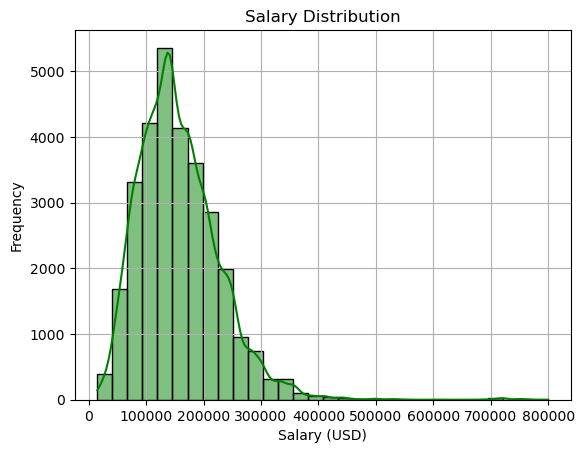

In [19]:
# Describing and visualizing distribution within the salary column's values via Seaborn and Matplotlib
sns.histplot(df['Salary (USD)'], bins=30, color='green', kde=True)
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.grid()
plt.savefig("Images/Salary_Distribution")
plt.show()


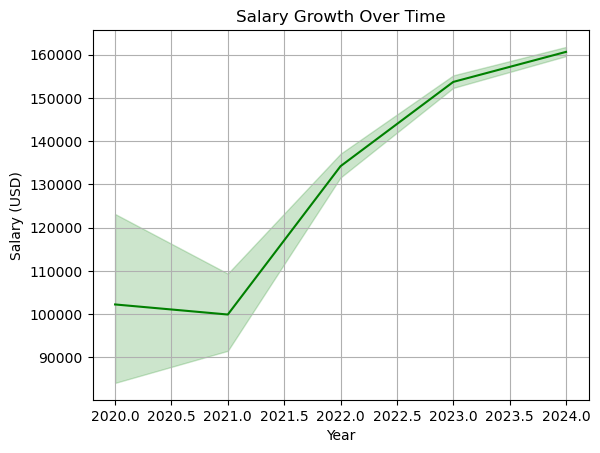

In [20]:
# Contextualizing growth trends of 'Salary (USD)' over time (from 2020 to 2024)
sns.lineplot(x='Year', y='Salary (USD)', data=df, color='green')
plt.title('Salary Growth Over Time')
plt.grid()
plt.savefig("Images/Salary_Growth_Over_Time")
plt.show()


### Salary vs. Position Title

In [21]:
# Describing and visualizing salary distribution witin each employment title's group
salary_by_title = df.groupby('Title')['Salary (USD)'].describe()
salary_by_title


count           mean            std  \
Title                                                                  
AI Architect                      61.0  231504.688525  109999.449563   
AI Data Scientist                  1.0   60000.000000            NaN   
AI Developer                      43.0  161189.418605   75027.271448   
AI Engineer                      261.0  160910.287356   72507.442744   
AI Product Manager                 9.0  158977.777778   59400.647677   
...                                ...            ...            ...   
Staff Data Scientist               2.0  134500.000000   41719.300090   
Staff Machine Learning Engineer    1.0  185000.000000            NaN   
Statistical Programmer            20.0  147962.650000   61973.061766   
Systems Engineer                  26.0  148391.730769   46337.463085   
Technical Lead                     8.0  207750.000000   67745.553360   

                                      min        25%       50%       75%  \
Title                                                                      
AI Architect                      92000.0  158800.00  208000.0  289000.0   
AI Data Scientist                 60000.0   60000.00   60000.0   60000.0   
AI Developer                      33333.0  109000.00  161952.0  207968.0   
AI Engineer                       21593.0   96600.00  160000.0  210000.0   
AI Product Manager                93300.0   96600.00  159000.0  212000.0   
...                                   ...        ...       ...       ...   
Staff Data Scientist             105000.0  119750.00  134500.0  149250.0   
Staff Machine Learning Engineer  185000.0  185000.00  185000.0  185000.0   
Statistical Programmer            53300.0  103025.00  154900.0  177000.0   
Systems Engineer                  62521.0  113621.75  152320.0  168250.0   
Technical Lead                   125600.0  141350.00  207500.0  265500.0   

                                      max  
Title                                      
AI Architect                     800000.0  
AI Data Scientist                 60000.0  
AI Developer                     316900.0  
AI Engineer                      400000.0  
AI Product Manager               238600.0  
...                                   ...  
Staff Data Scientist             164000.0  
Staff Machine Learning Engineer  185000.0  
Statistical Programmer           259400.0  
Systems Engineer                 265000.0  
Technical Lead                   296000.0  

[197 rows x 8 columns]

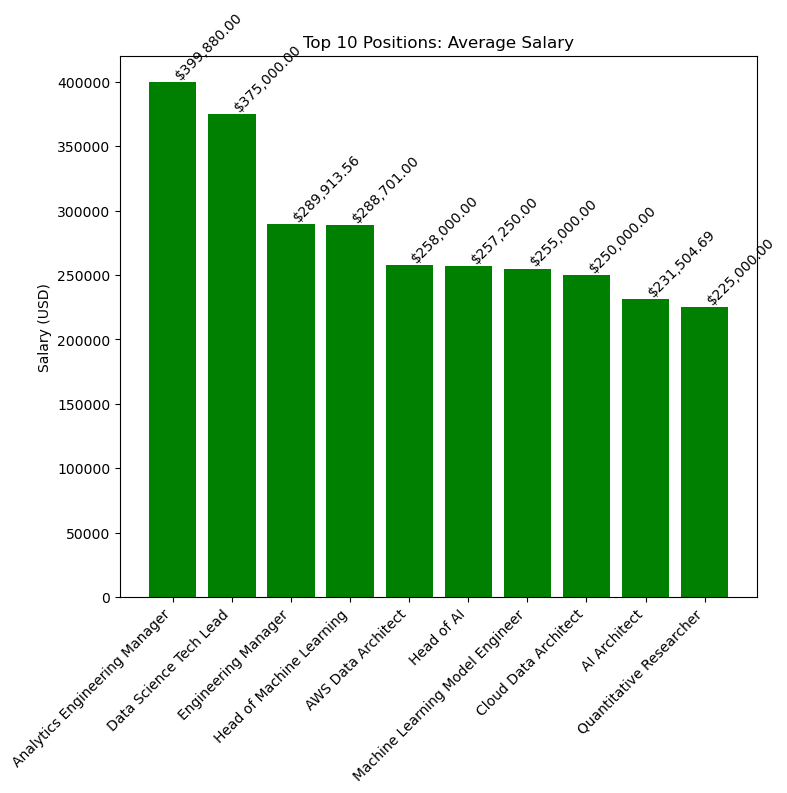

In [22]:
# Sorting results in desending order to identify the titles associated with the top 10 highest and bottom 10 lowest average salaries
## Top 10
salary_by_title_sorted_df = salary_by_title.sort_values(by='mean', ascending=False)
top_10_salary_df = salary_by_title_sorted_df.head(10)
bottom_10_salary_df = salary_by_title_sorted_df.tail(10)
plt.figure(figsize=(8, 8))
data = plt.bar(top_10_salary_df.index, top_10_salary_df['mean'], color='green')
for average in data:
    value = average.get_height()
    plt.text(average.get_x() + average.get_width() / 2, value,
             f'${value:,.2f}', ha='left', va='bottom', rotation=45)
plt.title("Top 10 Positions: Average Salary")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Images/Top_10_Positions_Average_Salary")
plt.show()


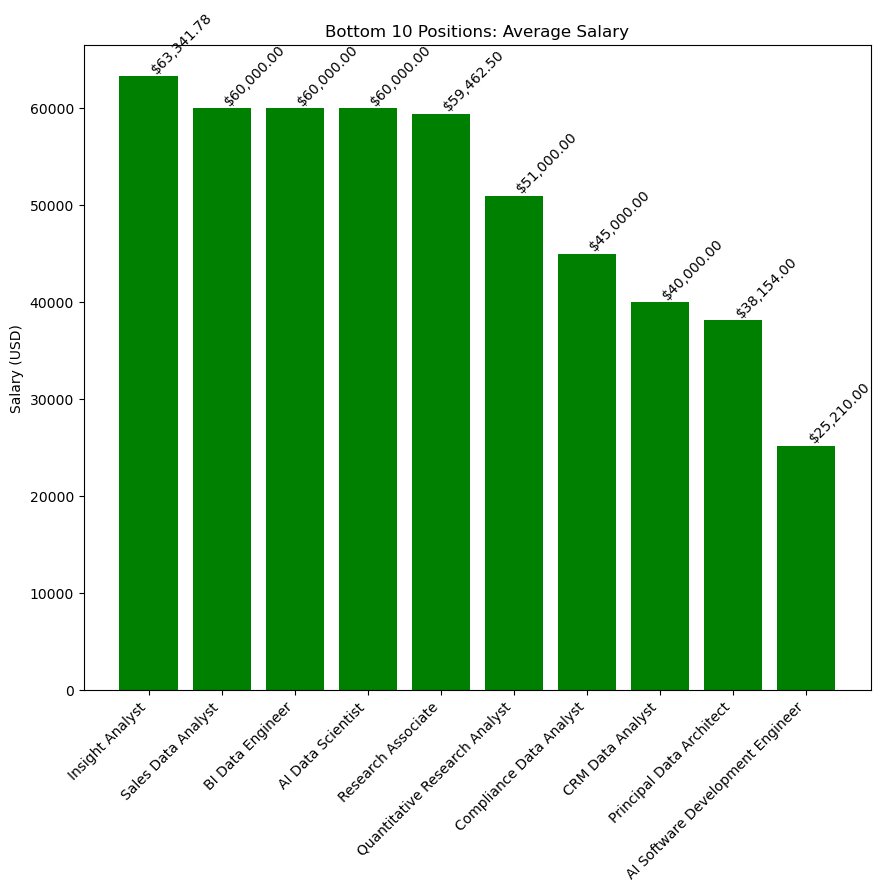

In [23]:
# Sorting results in desending order to identify the titles associated with the top 10 highest and bottom 10 lowest average salaries
## Bottom 10
plt.figure(figsize=(9, 9))
data = plt.bar(bottom_10_salary_df.index, bottom_10_salary_df['mean'], color='green')
for average in data:
    value = average.get_height()
    plt.text(average.get_x() + average.get_width() / 2, value,
             f'${value:,.2f}', ha='left', va='bottom', rotation=45)
plt.title("Bottom 10 Positions: Average Salary")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Images/Bottom_10_Positions_Average_Salary")
plt.show()


### Salary vs. Company Size

In [24]:
# Describing and visualizing salary distribution witin each company size category
salary_by_company_size = df.groupby('Company Size')['Salary (USD)'].describe()
salary_by_company_size


count           mean           std      min       25%  \
Company Size                                                               
Large (>250)      1336.0  146031.153443  71413.612843  15000.0   91150.0   
Medium (50-250)  28616.0  157615.814439  70724.210575  15000.0  108100.0   
Small (<50)        199.0   88398.281407  57686.541458  15809.0   50000.0   

                      50%       75%       max  
Company Size                                   
Large (>250)     136000.0  205600.0  423000.0  
Medium (50-250)  147530.0  196900.0  800000.0  
Small (<50)       75648.0  116434.5  416000.0

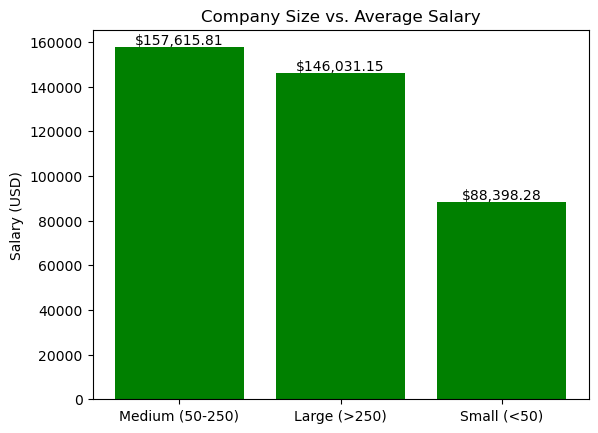

In [25]:
# Sorting company size by average salary results in desending order
salary_by_company_size_sorted_df = salary_by_company_size.sort_values(by='mean', ascending=False)
data = plt.bar(salary_by_company_size_sorted_df.index, salary_by_company_size_sorted_df['mean'], color='green')
for average in data:
    value = average.get_height()
    plt.text(average.get_x() + average.get_width() / 2, value,
             f'${value:,.2f}', ha='center', va='bottom')
plt.title("Company Size vs. Average Salary")
plt.ylabel("Salary (USD)")
plt.savefig("Images/Company_Size_Average_Salary")
plt.show()


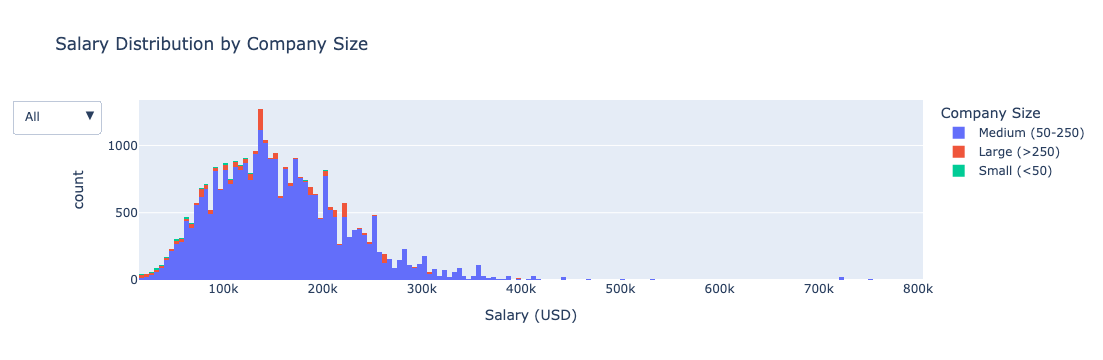

In [26]:
# Explore salary distribution within each company size grouping
fig = px.histogram(
    df,
    x="Salary (USD)",
    color="Company Size",
    title="Salary Distribution by Company Size",
    labels="Salary in USD"
)
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "method": "update",
                    "label": "All",
                    "args": [{"visible": [True, True, True]}, {"title": "Salary Distribution by Company Size"}],
                },
                {
                    "method": "update",
                    "label": "Small",
                    "args": [{"visible": [False, False, True]}, {"title": "Salary Distribution for Small Companies"}],
                },
                {
                    "method": "update",
                    "label": "Medium",
                    "args": [{"visible": [True, False, False]}, {"title": "Salary Distribution for Medium Companies"}],
                },
                {
                    "method": "update",
                    "label": "Large",
                    "args": [{"visible": [False, True, False]}, {"title": "Salary Distribution for Large Companies"}],
                },
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)
fig.write_html("Images/Company_Size_Salary_Distribution.html")
fig.show()


### Salary vs. Company Location

In [27]:
# Describing and visualizing salary distribution witin each company location
salary_by_country = df.groupby('Company Location')['Salary (USD)'].describe()
salary_by_country


count           mean           std       min  \
Company Location                                                       
Algeria                   2.0  100000.000000      0.000000  100000.0   
American Samoa            4.0   38763.250000  19532.473873   18053.0   
Andorra                   1.0   50745.000000           NaN   50745.0   
Argentina                21.0   85409.428571  46794.332858   30000.0   
Armenia                   3.0   30888.666667  17388.881083   16000.0   
...                       ...            ...           ...       ...   
Ukraine                  12.0  103000.000000  65407.811599   48000.0   
United Arab Emirates      5.0   86000.000000  33800.887562   40000.0   
United States         27208.0  162575.423184  69037.496624   20000.0   
Venezuela                 2.0  192500.000000  40305.086528  164000.0   
Vietnam                   4.0   63000.000000  18000.000000   48000.0   

                            25%       50%       75%       max  
Company Location                                               
Algeria               100000.00  100000.0  100000.0  100000.0  
American Samoa         24763.25   38500.0   52500.0   60000.0  
Andorra                50745.00   50745.0   50745.0   50745.0  
Argentina              58200.00   72000.0   85200.0  210000.0  
Armenia                21333.00   26666.0   38333.0   50000.0  
...                         ...       ...       ...       ...  
Ukraine                57500.00   84000.0  112500.0  240000.0  
United Arab Emirates   65000.00   90000.0  115000.0  120000.0  
United States         115000.00  150000.0  200000.0  750000.0  
Venezuela             178250.00  192500.0  206750.0  221000.0  
Vietnam                48000.00   60000.0   75000.0   84000.0  

[80 rows x 8 columns]

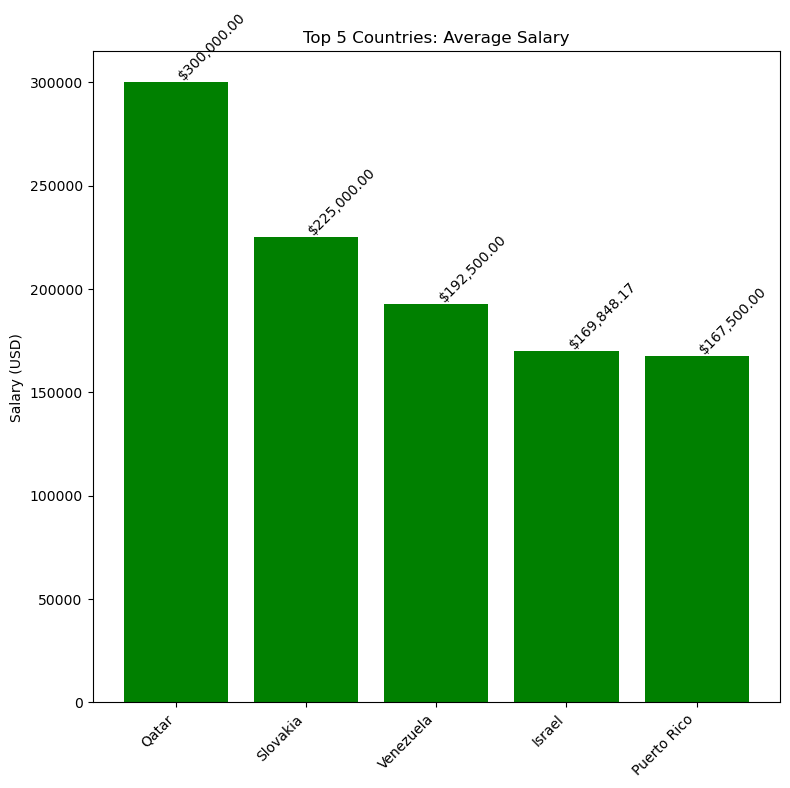

In [28]:
# Sorting results in desending order to identify the countries associated with the top 5 highest and bottom 5 lowest average salaries
# Top 5
salary_by_country_sorted_df = salary_by_country.sort_values(by='mean', ascending=False)
top_5_country_salary_df = salary_by_country_sorted_df.head(5)
bottom_5_country_salary_df = salary_by_country_sorted_df.tail(5)
plt.figure(figsize=(8, 8))
data = plt.bar(top_5_country_salary_df.index, top_5_country_salary_df['mean'], color='green')
for average in data:
    value = average.get_height()
    plt.text(average.get_x() + average.get_width() / 2, value,
             f'${value:,.2f}', ha='left', va='bottom', rotation=45)
plt.title("Top 5 Countries: Average Salary")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Images/Top_5_Countries_Average_Salary")
plt.show()


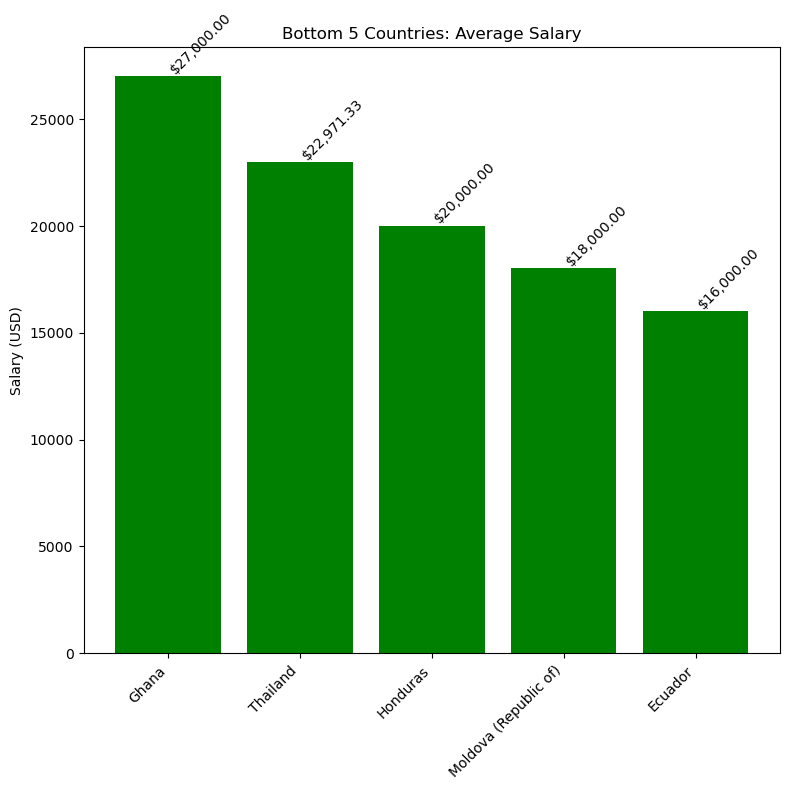

In [29]:
# Sorting results in desending order to identify the countries associated with the top 5 highest and bottom 5 lowest salaries
# Bottom 5
plt.figure(figsize=(8, 8))
data = plt.bar(bottom_5_country_salary_df.index, bottom_5_country_salary_df['mean'], color='green')
for average in data:
    value = average.get_height()
    plt.text(average.get_x() + average.get_width() / 2, value,
             f'${value:,.2f}', ha='left', va='bottom', rotation=45)
plt.title("Bottom 5 Countries: Average Salary")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Images/Bottom_5_Countries_Average_Salary")
plt.show()


### Number of Data Professionals vs. Company Location

In [30]:
# Describing and visualizing the total number of entries to retrieve a data professional count for each country within the dataset
## Note: Utilizing the 'Salary (USD)' column here
professionals_by_country = df.groupby('Company Location')['Salary (USD)'].count()
professionals_by_country_sorted = professionals_by_country.sort_values(ascending=False)
professionals_by_country_sorted_df = pd.DataFrame(professionals_by_country_sorted)
professionals_by_country_sorted_df.rename(columns= {"Salary (USD)": "# of Data Professionals"}, inplace=True)
professionals_by_country_sorted_df.reset_index(inplace=True)
professionals_by_country_sorted_df


Company Location  # of Data Professionals
0           United States                    27208
1           Great Britain                      991
2                  Canada                      873
3                   Spain                      137
4                 Germany                      129
..                    ...                      ...
75                Bahamas                        1
76  Moldova (Republic of)                        1
77                Andorra                        1
78              Mauritius                        1
79               Malaysia                        1

[80 rows x 2 columns]

In [31]:
# Filter performed to return a total count for the number of countries with less than 20 data professionals
## The result of 63 confirms a large number of countries represented within the dataset don't posess a wealth of entries for analysis
countries_less_than_20 = professionals_by_country_sorted_df.loc[professionals_by_country_sorted_df['# of Data Professionals'] < 20]
countries_less_than_20


Company Location  # of Data Professionals
17                  Italy                       18
18                 Poland                       17
19                 Latvia                       16
20               Colombia                       16
21                 Turkey                       15
..                    ...                      ...
75                Bahamas                        1
76  Moldova (Republic of)                        1
77                Andorra                        1
78              Mauritius                        1
79               Malaysia                        1

[63 rows x 2 columns]

In [32]:
# Utilizing 'Geoapify' API to retrieve geo-coordinates for each country

# Initializing two empty Latitude and Longitude columns within the DataFrame to hold results
professionals_by_country_sorted_df['Latitude'] = ""
professionals_by_country_sorted_df['Longitude'] = ""

# Looping through each row (Country) within the DataFrame and establishing required parameters to obtain coordinates
print("Retrieving Data...")
print("------------------")
for index, row in professionals_by_country_sorted_df.iterrows():
    base_url = "https://api.geoapify.com/v1/geocode/search?"
    params = {
        "text": row['Company Location'],
        "apiKey": key_one,
    }

    # API request converted to JSON and appending new columns with appropriate Latitude and Longitude values
    try:
        response = requests.get(base_url, params=params).json()
        professionals_by_country_sorted_df.loc[index, "Latitude"] = response['features'][0]['properties']['lat']
        professionals_by_country_sorted_df.loc[index, "Longitude"] = response['features'][0]['properties']['lon']

    # Incorporate error handling to fill NaN if necessary
    except (KeyError, IndexError, requests.RequestException):
        professionals_by_country_sorted_df.loc[index, "Latitude"] = np.nan
        professionals_by_country_sorted_df.loc[index, "Longitude"] = np.nan

# Display updated DataFrame with retireve Latitude and Longitude values
print("------------------")
print("Retrieval Complete")
print("------------------")
professionals_by_country_sorted_df


Retrieving Data...
------------------
------------------
Retrieval Complete
------------------


Company Location  # of Data Professionals   Latitude   Longitude
0           United States                    27208   39.78373 -100.445882
1           Great Britain                      991  54.315159   -1.918153
2                  Canada                      873  61.066692 -107.991707
3                   Spain                      137  39.326068   -4.837979
4                 Germany                      129  51.163818   10.447831
..                    ...                      ...        ...         ...
75                Bahamas                        1  24.773655  -78.000055
76  Moldova (Republic of)                        1  47.267881   28.584363
77                Andorra                        1  42.506939    1.521247
78              Mauritius                        1 -20.275945   57.570357
79               Malaysia                        1   4.569375  102.265682

[80 rows x 4 columns]

In [33]:
# Confirm the updated DataFrame does NOT include any Null values (correct hydration of Latitude/Longitude columns)
professionals_by_country_sorted_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Company Location         80 non-null     object
 1   # of Data Professionals  80 non-null     int64 
 2   Latitude                 80 non-null     object
 3   Longitude                80 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.6+ KB


In [34]:
# Utilizing hvplot in conjuction with the above DataFrame to map each country with an associated dot size representing
## relative number of data professionals
new_fig = professionals_by_country_sorted_df.hvplot.points('Longitude','Latitude', geo=True, tiles='OSM', height=580, width=1000,
                                                 color='Company Location', size='# of Data Professionals',
                                                 alpha=0.5, title="Data Professional Density vs. Company Location",
                                                 xlabel="Longitude", ylabel="Latitude",
                                                 hover_cols=['Company Location', '# of Data Professionals',])

# Convert this figure ('new_fig') to a panel object in order to save to images folder
panel_to_save = pn.panel(new_fig)
panel_to_save.save("Images/Data_Professionals_by_Country.html")
panel_to_save


HoloViews(Overlay, height=580, sizing_mode='fixed', width=1000)

### Salary Distributions for Top 5 Countries in # of Data Professionals

In [35]:
# Returning a list of the top 5 most popular countries for data professionals
top_5_countries_list = professionals_by_country_sorted_df["Company Location"].head(5)
# This returns the top five countries with the most data professionals
## United States, Great Britain, Canada, Spain, & Germany
top_5_countries_list


0    United States
1    Great Britain
2           Canada
3            Spain
4          Germany
Name: Company Location, dtype: object

In [36]:
# Filter our initial cleaned DataFrame to return only entries associated witht the previously identified top 5 countries for data professionals
top_5_countries_count_df = df.loc[df['Company Location'].isin(top_5_countries_list)]
top_5_countries_count_df


Year                           Title                Experience  \
0      2024                   Lead Engineer     Senior-level / Expert   
1      2024  Business Intelligence Engineer     Senior-level / Expert   
2      2024                 Data Specialist     Senior-level / Expert   
3      2024                  Data Scientist     Senior-level / Expert   
4      2024  Business Intelligence Engineer     Senior-level / Expert   
...     ...                             ...                       ...   
30145  2021                 Data Specialist     Senior-level / Expert   
30146  2021        Principal Data Scientist  Mid-level / Intermediate   
30147  2020                  Data Scientist      Entry-level / Junior   
30149  2020                  Data Scientist     Senior-level / Expert   
30150  2020           Business Data Analyst      Entry-level / Junior   

      Employment Status  Salary (USD) Employee Residence  Remote Ratio  \
0             Full-time        194000      United States             0   
1             Full-time        116800      United States             0   
2             Full-time         56250      Great Britain             0   
3             Full-time        314000      United States             0   
4             Full-time         86500      United States             0   
...                 ...           ...                ...           ...   
30145         Full-time        165000      United States           100   
30146         Full-time        151000      United States           100   
30147         Full-time        105000      United States           100   
30149         Full-time        412000      United States           100   
30150          Contract        100000      United States           100   

      Company Location     Company Size  
0        United States  Medium (50-250)  
1        United States  Medium (50-250)  
2        Great Britain  Medium (50-250)  
3        United States  Medium (50-250)  
4        United States  Medium (50-250)  
...                ...              ...  
30145    United States     Large (>250)  
30146    United States     Large (>250)  
30147    United States      Small (<50)  
30149    United States     Large (>250)  
30150    United States     Large (>250)  

[29338 rows x 9 columns]

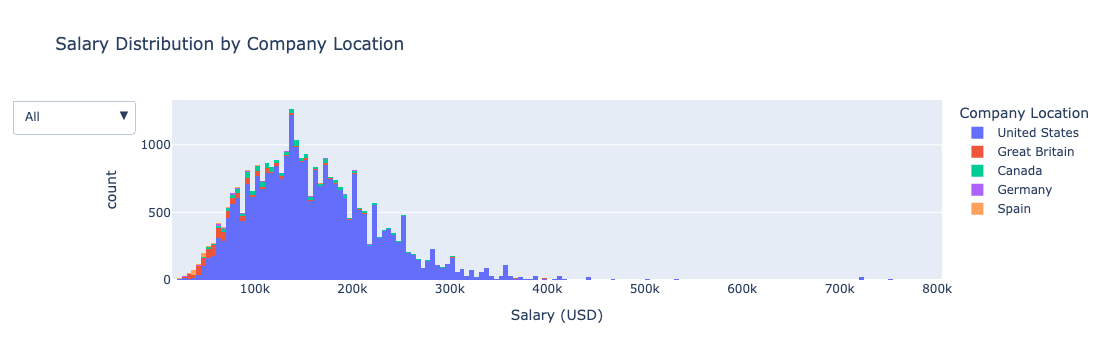

In [37]:
# Visualize the salary distributions for each country within our top 5 list
fig = px.histogram(
    top_5_countries_count_df,
    x="Salary (USD)",
    color="Company Location",
    title="Salary Distribution by Company Location",
    labels="Salary in USD"
)
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "method": "update",
                    "label": "All",
                    "args": [{"visible": [True, True, True, True, True]}, {"title": "Salary Distribution by Company Location"}],
                },
                {
                    "method": "update",
                    "label": "United States",
                    "args": [{"visible": [True, False, False, False, False]}, {"title": "Salary Distribution for United States"}],
                },
                {
                    "method": "update",
                    "label": "Great Britain",
                    "args": [{"visible": [False, True, False, False, False]}, {"title": "Salary Distribution for Great Britain"}],
                },
                {
                    "method": "update",
                    "label": "Canada",
                    "args": [{"visible": [False, False, True, False, False]}, {"title": "Salary Distribution for Canada"}],
                },
                 {
                    "method": "update",
                    "label": "Germany",
                    "args": [{"visible": [False, False, False, True, False]}, {"title": "Salary Distribution for Germany"}],
                },
                 {
                    "method": "update",
                    "label": "Spain",
                    "args": [{"visible": [False, False, False, False, True]}, {"title": "Salary Distribution for Spain"}],
                },
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)
fig.write_html("Images/Company_Location_Salary_Distribution.html")
fig.show()


### Mean, Median, Maximum & Minimum Salaries for Top 5 Countries in # of Data Professionals

In [38]:
# Sort the salary by country DataFrame by count then use the head method to retrieve salary statistics for the
## top 5 countries in terms of # of Data Professionals
x = salary_by_country.sort_values(by='count', ascending=False)
top_5 = x.head(5)
top_5


count           mean           std      min       25%  \
Company Location                                                            
United States     27208.0  162575.423184  69037.496624  20000.0  115000.0   
Great Britain       991.0   89070.934410  54337.089497  26992.0   54431.5   
Canada              873.0  141566.526919  62293.053875  15000.0   96113.0   
Spain               137.0   57393.321168  34007.504993  21593.0   38868.0   
Germany             129.0  106968.193798  68548.360261  15966.0   63831.0   

                       50%       75%       max  
Company Location                                
United States     150000.0  200000.0  750000.0  
Great Britain      73824.0  107354.0  437502.0  
Canada            133700.0  176000.0  800000.0  
Spain              48585.0   64781.0  253750.0  
Germany            83000.0  133333.0  350000.0

In [39]:
# Store relevant information within a dictionary for each of the top 5 countries
us_value_dict = {"Mean": top_5.iloc[0,1], "Minimum": top_5.iloc[0,3], "Maximum": top_5.iloc[0,7]}
gb_value_dict = {"Mean": top_5.iloc[1,1], "Minimum": top_5.iloc[1,3], "Maximum": top_5.iloc[1,7]}
can_value_dict = {"Mean": top_5.iloc[2,1], "Minimum": top_5.iloc[2,3], "Maximum": top_5.iloc[2,7]}
spa_value_dict = {"Mean": top_5.iloc[3,1], "Minimum": top_5.iloc[3,3], "Maximum": top_5.iloc[3,7]}
ger_value_dict = {"Mean": top_5.iloc[4,1], "Minimum": top_5.iloc[4,3], "Maximum": top_5.iloc[4,7]}


In [40]:
# Convert separate dictionaries into series to be combined into a DataFrame for graphing
us_value_series = pd.Series(us_value_dict)
gb_value_series = pd.Series(gb_value_dict)
can_value_series = pd.Series(can_value_dict)
spa_value_series = pd.Series(spa_value_dict)
ger_value_series = pd.Series(ger_value_dict)


In [41]:
# Merge the series into a DataFrame while providing index names
values = pd.DataFrame(data = [us_value_series, gb_value_series, can_value_series, spa_value_series, ger_value_series],
                      index=["United States", "Great Britain", "Canada", "Spain", "Germany"])
values


Mean  Minimum   Maximum
United States  162575.423184  20000.0  750000.0
Great Britain   89070.934410  26992.0  437502.0
Canada         141566.526919  15000.0  800000.0
Spain           57393.321168  21593.0  253750.0
Germany        106968.193798  15966.0  350000.0

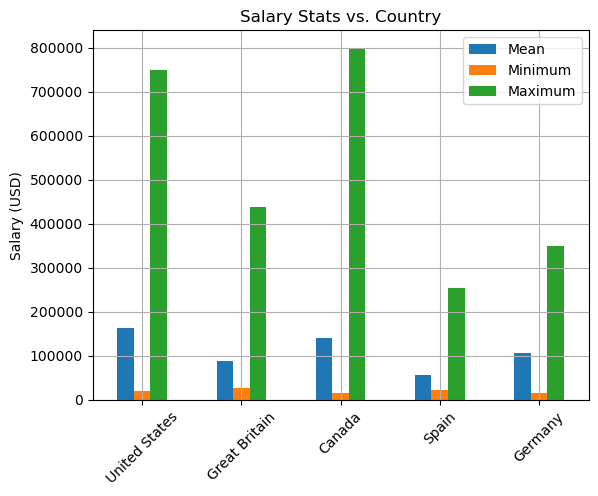

In [42]:
# Graph the resulting DataFrame
values.plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Salary Stats vs. Country")
plt.legend(loc='best')
plt.ylabel("Salary (USD)")
plt.grid()
plt.savefig("Images/Country_Salary_Stats.png")
plt.show()


### Salary vs. Experience Level

In [43]:
# Describing and visualizing salary distribution witin each experience level
salary_by_experience = df.groupby('Experience')['Salary (USD)'].describe()
salary_by_experience


count           mean           std      min  \
Experience                                                                  
Entry-level / Junior         2605.0  102768.909021  56434.834148  15000.0   
Executive-level / Director    703.0  196443.183499  71566.516797  15000.0   
Mid-level / Intermediate     8378.0  139159.151707  70074.983274  15000.0   
Senior-level / Expert       18465.0  170665.317411  67373.287301  15809.0   

                                 25%       50%       75%       max  
Experience                                                          
Entry-level / Junior         64000.0   90000.0  132300.0  774000.0  
Executive-level / Director  145000.0  194500.0  236000.0  488000.0  
Mid-level / Intermediate     90000.0  130000.0  173000.0  800000.0  
Senior-level / Expert       124800.0  161000.0  207000.0  750000.0

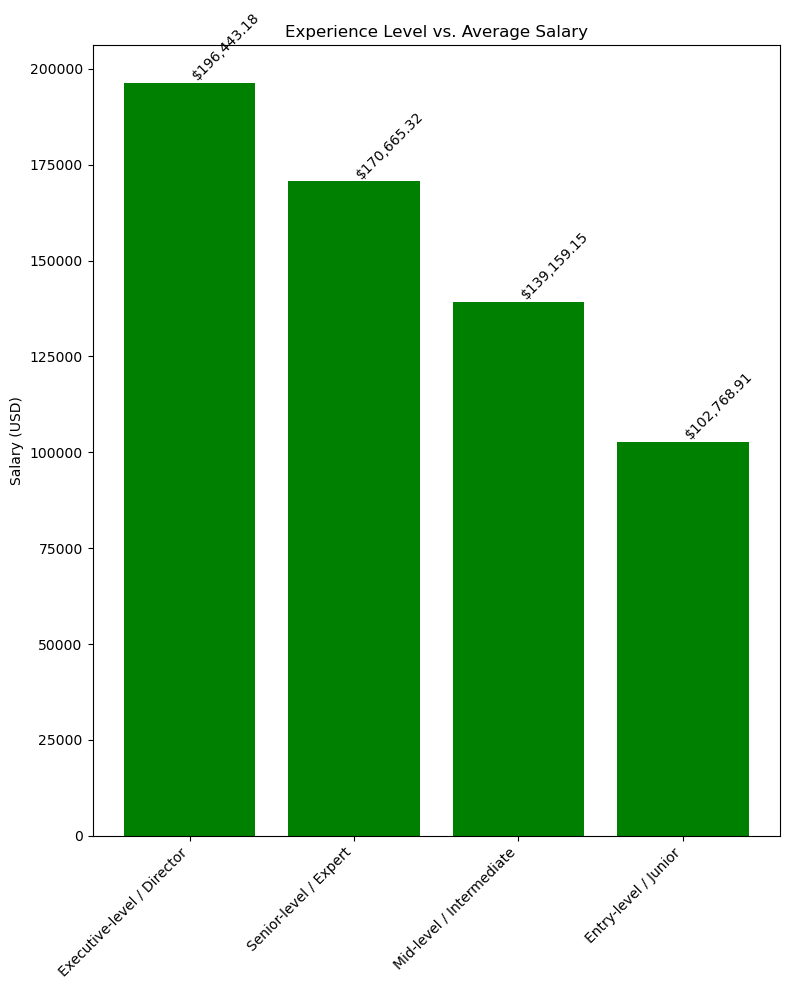

In [44]:
# Graphing the average salary within each experience level group
salary_by_experience_sorted_df = salary_by_experience.sort_values(by='mean', ascending=False)
plt.figure(figsize=(8, 10))
data = plt.bar(salary_by_experience_sorted_df.index, salary_by_experience_sorted_df['mean'], color='green')
for average in data:
    value = average.get_height()
    plt.text(average.get_x() + average.get_width() / 2, value,
             f'${value:,.2f}', ha='left', va='bottom', rotation=45)
plt.title("Experience Level vs. Average Salary")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Images/Experience_Level_Average_Salary")
plt.show()


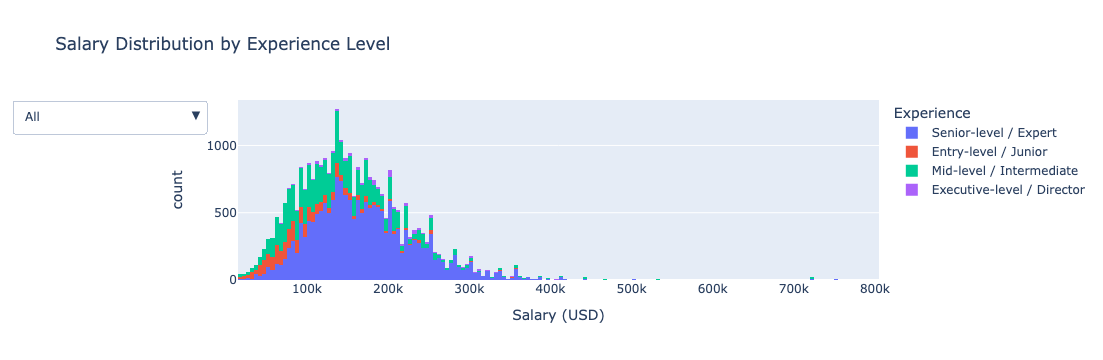

In [45]:
# Exploring salary distribution within each experience level
fig = px.histogram(
    df,
    x="Salary (USD)",
    color="Experience",
    title="Salary Distribution by Experience Level",
    labels="Salary in USD"
)
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "method": "update",
                    "label": "All",
                    "args": [{"visible": [True, True, True, True]}, {"title": "Salary Distribution by Experience Level"}],
                },
                {
                    "method": "update",
                    "label": "Senior-level / Expert",
                    "args": [{"visible": [True, False, False, False,]}, {"title": "Salary Distribution for Senior-level / Expert"}],
                },
                {
                    "method": "update",
                    "label": "Entry-level / Junior",
                    "args": [{"visible": [False, True, False, False]}, {"title": "Salary Distribution for Entry-level / Junior"}],
                },
                {
                    "method": "update",
                    "label": "Mid-level / Intermediate",
                    "args": [{"visible": [False, False, True, False]}, {"title": "Salary Distribution for Mid-level / Intermediate"}],
                },
                 {
                    "method": "update",
                    "label": "Executive-level / Director",
                    "args": [{"visible": [False, False, False, True]}, {"title": "Salary Distribution for Executive-level / Director"}],
                },
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)
fig.write_html("Images/Experience_Level_Salary_Distribution.html")
fig.show()


### Salary vs. Remote Ratio

In [46]:
# Describing and visualizing salary distribution witin each remote ratio group
salary_by_remote_ratio = df.groupby('Remote Ratio')['Salary (USD)'].describe()
salary_by_remote_ratio


count           mean           std      min       25%  \
Remote Ratio                                                            
0             22480.0  160270.574288  72533.091618  15000.0  109875.0   
50              257.0   82145.093385  61255.768964  15129.0   44444.0   
100            7414.0  148237.014567  63860.716009  15000.0  104000.0   

                   50%       75%       max  
Remote Ratio                                
0             149300.0  200200.0  774000.0  
50             66022.0  104024.0  423000.0  
100           142800.0  185000.0  800000.0

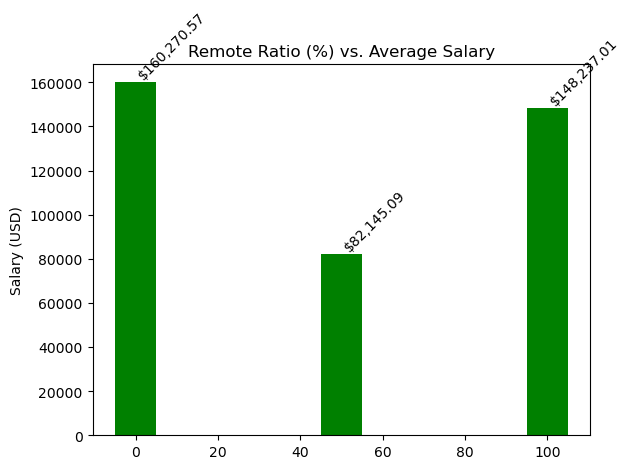

In [47]:
# Graphing the average salary within each remote ratio group
salary_by_remote_ratio_sorted_df = salary_by_remote_ratio.sort_values(by='mean', ascending=False)
data = plt.bar(salary_by_remote_ratio_sorted_df.index, salary_by_remote_ratio_sorted_df['mean'], color='green', width = 10)
for average in data:
    value = average.get_height()
    plt.text(average.get_x() + average.get_width() / 2, value,
             f'${value:,.2f}', ha='left', va='bottom', rotation=45)
plt.title("Remote Ratio (%) vs. Average Salary")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.savefig("Images/Remote_Ratio_Average_Salary")
plt.show()


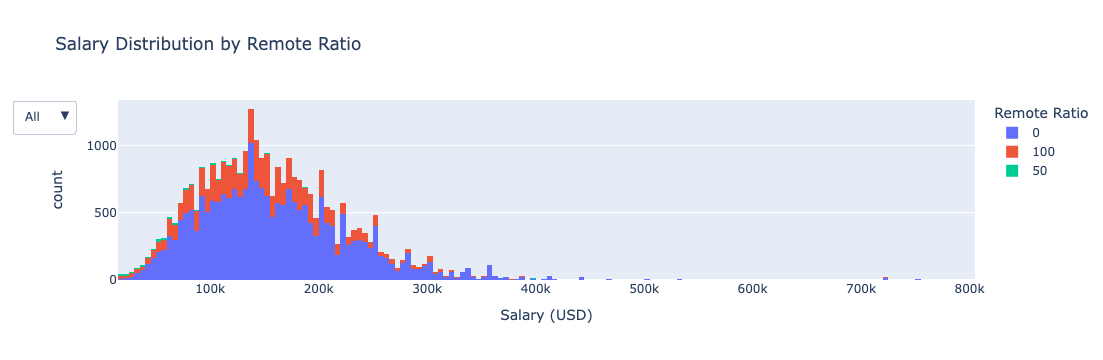

In [48]:
# Exploring salary distribution within each remote ratio group
fig = px.histogram(
    df,
    x="Salary (USD)",
    color="Remote Ratio",
    title="Salary Distribution by Remote Ratio",
    labels="Salary in USD"
)
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "method": "update",
                    "label": "All",
                    "args": [{"visible": [True, True, True]}, {"title": "Salary Distribution by Remote Ratio"}],
                },
                {
                    "method": "update",
                    "label": "0",
                    "args": [{"visible": [True, False, False]}, {"title": "Salary Distribution for 0% Remote Work"}],
                },
                {
                    "method": "update",
                    "label": "100",
                    "args": [{"visible": [False, True, False]}, {"title": "Salary Distribution for 100% Remote Work"}],
                },
                {
                    "method": "update",
                    "label": "50",
                    "args": [{"visible": [False, False, True]}, {"title": "Salary Distribution for 50% Remote Work"}],
                },
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)
fig.write_html("Images/Remote_Ratio_Salary_Distribution.html")
fig.show()
